In [1]:
%matplotlib inline


# Variational with birth and merge proposals for DP mixtures of Gaussians

How to train a DP mixture model.

We'll show that despite diverse, poor quality initializations, our proposal moves that insert new clusters (birth) and remove redundant clusters (merge) can consistently recover the same ideal posterior with 8 clusters.


In [22]:
# SPECIFY WHICH PLOT CREATED BY THIS SCRIPT IS THE THUMBNAIL IMAGE
# sphinx_gallery_thumbnail_number = 2

import bnpy
import numpy as np
import os

from matplotlib import pylab
import seaborn as sns

FIG_SIZE = (3, 3)
pylab.rcParams['figure.figsize'] = FIG_SIZE

Read dataset from file.



In [2]:
dataset_path = os.path.join(bnpy.DATASET_PATH, 'AsteriskK8')
dataset = bnpy.data.XData.read_npz(
    os.path.join(dataset_path, 'x_dataset.npz'))


Make a simple plot of the raw data



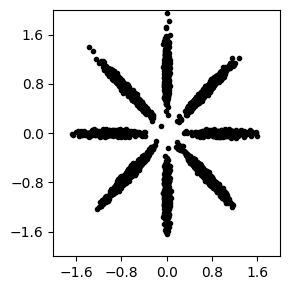

In [3]:
pylab.plot(dataset.X[:, 0], dataset.X[:, 1], 'k.')
pylab.gca().set_xlim([-2, 2])
pylab.gca().set_ylim([-2, 2])
pylab.tight_layout()
# print(dataset.X[:5])
# '''
# [[-0.05158827 -1.06446662]
#  [-0.74445191  0.73483378]
#  [ 0.0169986   0.93904905]
#  [ 0.6864576   0.67030583]
#  [ 0.52385528  0.53733642]]
# '''
# print(type(dataset.X)) # <class 'numpy.ndarray'>

## Setup: Function for visualization
Here's a short function to show the learned clusters over time.



In [4]:
def show_clusters_over_time(
        task_output_path=None,
        query_laps=[0, 1, 2, 5, 10, None],
        nrows=2):
    ''' Read model snapshots from provided folder and make visualizations

    Post Condition
    --------------
    New matplotlib plot with some nice pictures.
    '''
    ncols = int(np.ceil(len(query_laps) // float(nrows)))
    fig_handle, ax_handle_list = pylab.subplots(
        figsize=(FIG_SIZE[0] * ncols, FIG_SIZE[1] * nrows),
        nrows=nrows, ncols=ncols, sharex=True, sharey=True)
    for plot_id, lap_val in enumerate(query_laps):
        cur_model, lap_val = bnpy.load_model_at_lap(task_output_path, lap_val)
        # Plot the current model
        cur_ax_handle = ax_handle_list.flatten()[plot_id]
        bnpy.viz.PlotComps.plotCompsFromHModel(
            cur_model, Data=dataset, ax_handle=cur_ax_handle)
        cur_ax_handle.set_xticks([-2, -1, 0, 1, 2])
        cur_ax_handle.set_yticks([-2, -1, 0, 1, 2])
        cur_ax_handle.set_xlabel("lap: %d" % lap_val)
    pylab.tight_layout()

## Training from K=1 cluster

Using 1 initial cluster, with birth and merge proposal moves.



Dataset Summary:
X Data
  total size: 5000 units
  batch size: 5000 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 4 
  beta = [ 0.2  0.2] 
  Expectations
  E[  mean[k]] = 
  [ 0  0]
  E[ covar[k]] = 
  [[0.1 0. ]
   [0.  0.1]]
Initialization:
  initname = randexamples
  K = 1 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/AsteriskK8/trymoves-K=1/1
BIRTH @ lap 1.00: Disabled. Waiting for lap >= 2 (--b_startLap).
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
    1.000/100 after      0 sec. |    180.4 MiB | K    1 | loss  1.104981521e+00 |  
MERGE @ lap 2.00: Disabled. Waiting for lap >= 5 (--m_startLap).
BIRTH @ lap 2.00 : Ad

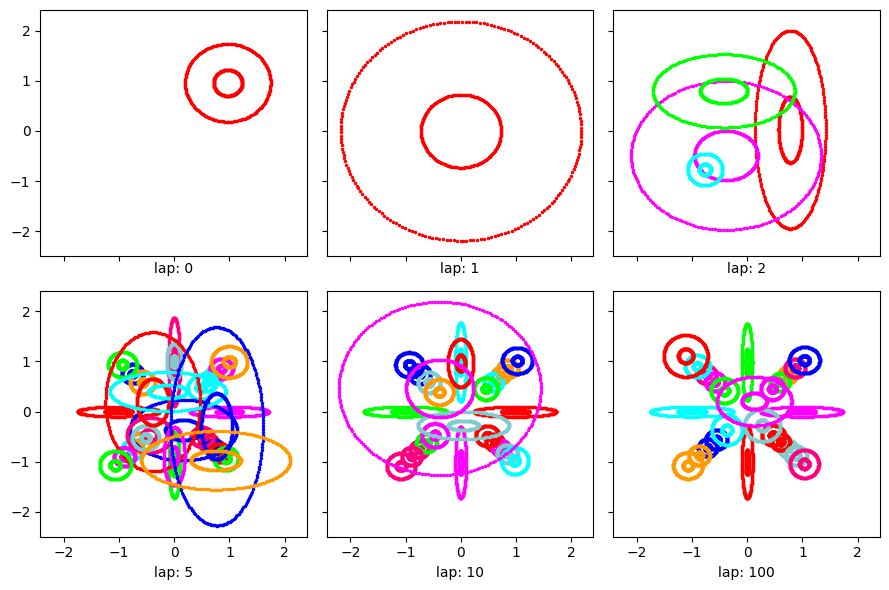

In [5]:
K1_trained_model, K1_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'DiagGauss', 'memoVB',
    output_path='/tmp/AsteriskK8/trymoves-K=1/',
    nLap=100, nTask=1, nBatch=1,
    sF=0.1, ECovMat='eye',
    K=1, initname='randexamples',
    moves='birth,merge,shuffle',
    m_startLap=5, b_startLap=2, b_Kfresh=4)

show_clusters_over_time(K1_info_dict['task_output_path'])



In [29]:
# K1_trained_model.allocModel.K ->8
# K1_trained_model.obsModel.D ->2
# means = K1_trained_model.obsModel.get_mean_for_comp(0) 
# sigma = K1_trained_model.obsModel.get_covar_mat_for_comp(0)
# print('number of components: ', K1_trained_model.obsModel.K)
# print('param dimension: ', K1_trained_model.obsModel.D)
# print('mean of first components: \n', means,type(means),means.shape)
# print('sigma of first components: \n', sigma,np.sum(sigma,axis=0),sigma.shape)

# np.save('test_save.npy', K1_info_dict)

data = np.load('test_save.npy', allow_pickle=True)
print(data)

{'status': 'done. not converged. max laps thru data exceeded.', 'task_output_path': '/tmp/AsteriskK8/trymoves-K=1/1', 'loss_history': array([1.10498152, 0.92002809, 0.63971389, 0.36416032, 0.29686198,
       0.27489952, 0.26396122, 0.2572696 , 0.25078683, 0.24522374,
       0.24238646, 0.23947206, 0.23739629, 0.23604986, 0.23457566,
       0.23404079, 0.23374087, 0.23354815, 0.23340986, 0.23330564,
       0.23322432, 0.23315878, 0.23310421, 0.23305718, 0.23301526,
       0.23297657, 0.23293968, 0.23290384, 0.23286836, 0.23283275,
       0.23279673, 0.23276015, 0.23272291, 0.232685  , 0.23264645,
       0.23260735, 0.23256745, 0.23252658, 0.2324854 , 0.23244398,
       0.23240287, 0.2323624 , 0.23232275, 0.23228412, 0.23224665,
       0.23221047, 0.23217565, 0.23214226, 0.2321103 , 0.23207977,
       0.2320506 , 0.23202271, 0.23199599, 0.23197031, 0.23194551,
       0.2319214 , 0.23189779, 0.23187443, 0.23185105, 0.23182732,
       0.2318028 , 0.23177693, 0.23174892, 0.23171758, 0.23168

In [43]:
# init
initArgsDict = dict(
initname = 'randexamples',
K = 1,
initarg = 0.0,
nRepeatTrue = 2,
initKextra = 1,
initLapFrac = -1.0,
initMinWordsPerDoc = 0,
initMinDocPerWord = 0,
initDim = 1000,
initLP = None,
initBlockLen = 20,
initFracJunk = 0.05,
initDropWordIDs = None,
initTargetCompID = 0,
init_NiterForBregmanKMeans = 1,
init_minNumAtomsInEachTargetDoc = 100,
init_setOneToPriorMean = 0,
initObsModelAddRandomNoise = 0,
initObsModelScale = 0.0
)
init_model = bnpy.make_initialized_model(
    Data=dataset,
    allocModelName='DPMixtureModel',
    obsModelName='DiagGauss',
    algName='memoVB',
    allocPriorArgsDict=dict(gamma0=1.0),
    obsPriorArgsDict=dict(min_covar = 1e-8, nu = 0, sF = 0.1, ECovMat = 'eye', kappa = 1e-4, MMat = 'zero'),
    initArgsDict=initArgsDict,
    seed=0,
)

In [10]:
# test init model
means = init_model.obsModel.get_mean_for_comp(0) 
sigma = init_model.obsModel.get_covar_mat_for_comp(0)
print('number of components: ', init_model.obsModel.K)
print('param dimension: ', init_model.obsModel.D)
print('mean of first components: \n', means)
print('sigma of first components: \n', sigma)
param = init_model.obsModel.calc_local_params(dataset)
param

NameError: name 'init_model' is not defined

In [61]:
# test trained model
param = K1_trained_model.calc_local_params(dataset)
print('assignment prob of each data point to the clusters\n',param['resp'][:5])
print('sum of one line of resp:', sum(param['resp'][0]))

assignment prob of each data point to the clusters
 [[1.00000000e-40 1.00000000e-40 1.00000000e-40 1.00000000e-40
  1.00000000e+00 1.00000000e-40 1.01250214e-14 1.00000000e-40]
 [1.00000000e-40 2.32700420e-15 1.00000000e-40 1.00000000e+00
  1.00000000e-40 1.00000000e-40 1.00000000e-40 1.00000000e-40]
 [1.00000000e-40 1.00000000e-40 1.00000000e-40 1.00000000e-40
  2.79631796e-15 1.00000000e-40 1.00000000e+00 1.00000000e-40]
 [1.00000000e+00 1.00000000e-40 1.41997192e-13 1.00000000e-40
  1.00000000e-40 1.00000000e-40 1.00000000e-40 1.00000000e-40]
 [1.00000000e+00 1.00000000e-40 1.00501854e-10 1.00000000e-40
  1.00000000e-40 1.00000000e-40 1.00000000e-40 1.00000000e-40]]
sum of one line of resp: 0.9999999999999999


## Training from K=4 cluster

Now using 4 initial clusters, with birth and merge proposal moves.



Dataset Summary:
X Data
  total size: 5000 units
  batch size: 5000 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [0. 0.] 
  E[ covar[k] ] = 
  [[0.1 0. ]
   [0.  0.1]]
Initialization:
  initname = randexamples
  K = 4 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/AsteriskK8/trymoves-K=4/1
BIRTH @ lap 1.00: Disabled. Waiting for lap >= 2 (--b_startLap).
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
    1.000/100 after      0 sec. |    192.5 MiB | K    4 | loss  9.001549009e-01 |  
MERGE @ lap 2.00: Disabled. Waiting for lap >= 5 (--m_startLap).
BIRTH @ lap 2.00 : Added 8 states. 2/4 succeeded. 2/4 failed eval phase. 0/4 failed build 

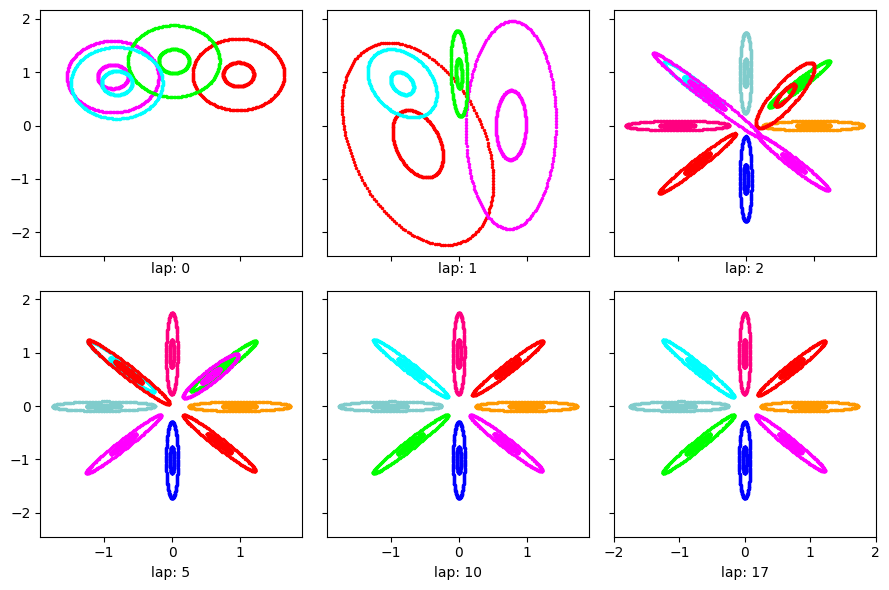

In [13]:
K4_trained_model, K4_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'Gauss', 'memoVB',
    output_path='/tmp/AsteriskK8/trymoves-K=4/',
    nLap=100, nTask=1, nBatch=1,
    sF=0.1, ECovMat='eye',
    K=4, initname='randexamples',
    moves='birth,merge,shuffle',
    m_startLap=5, b_startLap=2, b_Kfresh=4)

show_clusters_over_time(K4_info_dict['task_output_path'])
print(K4_trained_model)

## Training from K=8 cluster

Now using 8 initial clusters



Dataset Summary:
X Data
  total size: 5000 units
  batch size: 5000 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [0. 0.] 
  E[ covar[k] ] = 
  [[0.1 0. ]
   [0.  0.1]]
Initialization:
  initname = randexamples
  K = 8 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/AsteriskK8/trymoves-K=8/1
BIRTH @ lap 1.00: Disabled. Waiting for lap >= 2 (--b_startLap).
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
    1.000/100 after      0 sec. |    192.9 MiB | K    8 | loss  6.479391366e-01 |  
MERGE @ lap 2.00: Disabled. Waiting for lap >= 5 (--m_startLap).
BIRTH @ lap 2.00 : Added 12 states. 3/8 succeeded. 5/8 failed eval phase. 0/8 failed build

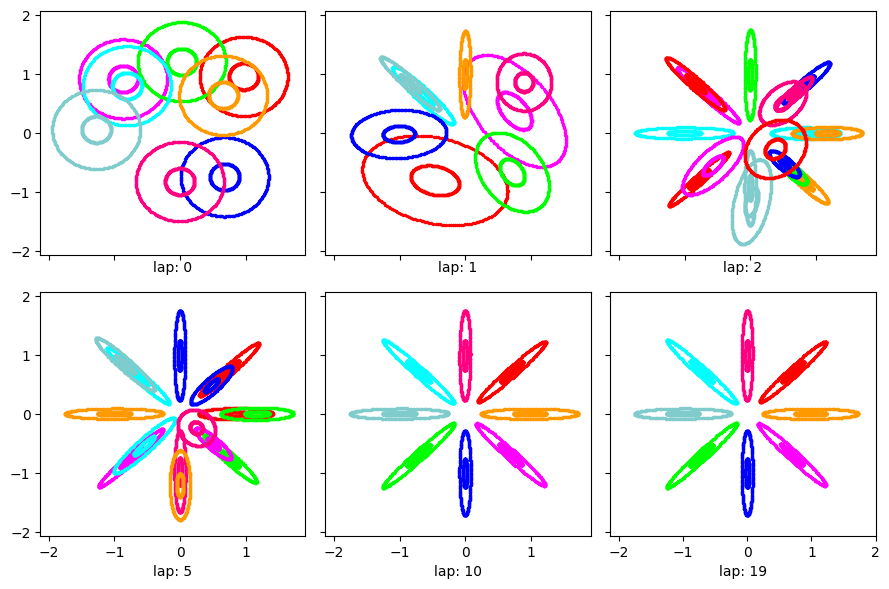

In [8]:
K8_trained_model, K8_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'Gauss', 'memoVB',
    output_path='/tmp/AsteriskK8/trymoves-K=8/',
    nLap=100, nTask=1, nBatch=1,
    sF=0.1, ECovMat='eye',
    K=8, initname='randexamples',
    moves='birth,merge,shuffle',
    m_startLap=5, b_startLap=2, b_Kfresh=4)

show_clusters_over_time(K8_info_dict['task_output_path'])

## Training from K=25 cluster

Now using 25 initial clusters



Dataset Summary:
X Data
  total size: 5000 units
  batch size: 5000 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [0. 0.] 
  E[ covar[k] ] = 
  [[0.1 0. ]
   [0.  0.1]]
Initialization:
  initname = randexamples
  K = 25 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/AsteriskK8/trymoves-K=25/1
BIRTH @ lap 1.00: Disabled. Waiting for lap >= 2 (--b_startLap).
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
    1.000/100 after      0 sec. |    200.6 MiB | K   25 | loss  4.392317798e-01 |  
MERGE @ lap 2.00: Disabled. Waiting for lap >= 5 (--m_startLap).
BIRTH @ lap 2.00 : Added 14 states. 4/18 succeeded. 11/18 failed eval phase. 3/18 failed

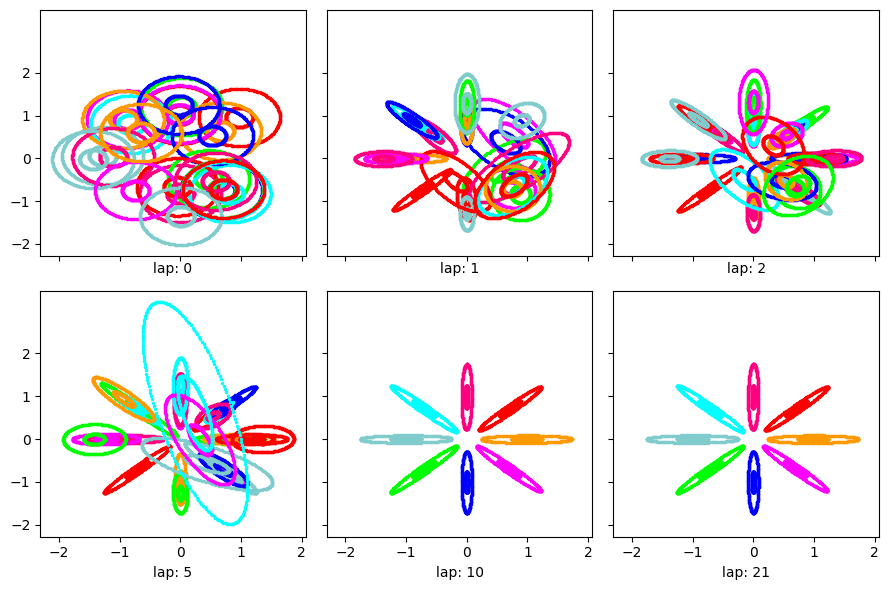

In [9]:
K25_trained_model, K25_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'Gauss', 'memoVB',
    output_path='/tmp/AsteriskK8/trymoves-K=25/',
    nLap=100, nTask=1, nBatch=1,
    sF=0.1, ECovMat='eye',
    K=25, initname='randexamples',
    moves='birth,merge,shuffle',
    m_startLap=5, b_startLap=2, b_Kfresh=4)

show_clusters_over_time(K25_info_dict['task_output_path'])

In [23]:
import torch
import bnpy
from bnpy.data.XData import XData

idx = torch.arange(10)
one_hot = torch.diag_embed(idx+1)
one_hot = (one_hot>0).long()
one_hot.shape[0]
z = one_hot[torch.randint(one_hot.shape[0], (1280,))]
z_in = XData(z.detach().cpu().numpy())
z_label = np.argmax(z, axis=-1)

In [6]:

import os
save_dir = "/home/yuan/Desktop/MasterThesis/src/CARE/bnpy/examples_jupyter/01_asterisk_K8/z_test/"

model, info_dict = bnpy.run(z_in, 'DPMixtureModel', 'DiagGauss', 'memoVB',
                            output_path=save_dir,
                            initname='randexamples',
                            K=1, gamma0=5.0,
                            ####################################################################
                            sF=0.001, ECovMat='eye', # sF=0.001 is able to classify all clusters
                            ####################################################################
                            moves='birth,merge', nBatch=1, nLap=2,
                            b_startLap=1,

                            # birth kwargs
                            b_stopLap=2,
                            b_Kfresh=10,
                            # b_minNumAtomsForNewComp=16.0,
                            # b_minNumAtomsForTargetComp=16.0,
                            # b_minNumAtomsForRetainComp=16.0,
                            # b_minPercChangeInNumAtomsToReactivate=0.02,
                            # b_debugWriteHTML=0,
                            
                            # merge kwargs
                            m_startLap=2,
                            m_maxNumPairsContainingComp=50,
                            m_nLapToReactivate=1,
                            m_pair_ranking_procedure='obsmodel_elbo',
                            # m_pair_ranking_procedure='total_size',
                            m_pair_ranking_direction='descending',
                            # **dict(
                            #     sum(map(list, [self.birth_kwargs.items(),
                            #                     self.merge_kwargs.items()]), []))
                            )

Dataset Summary:
X Data
  total size: 1280 units
  batch size: 1280 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 12  ...
  beta = [ 0.01  0.01]  ...
  Expectations
  E[  mean[k]] = 
  [ 0  0] ...
  E[ covar[k]] = 
  [[0.001 0.   ]
   [0.    0.001]] ...
Initialization:
  initname = randexamples
  K = 1 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /home/yuan/Desktop/MasterThesis/src/CARE/bnpy/examples_jupyter/01_asterisk_K8/z_test/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
BIRTH @ lap 1.00 : Added 9 states. 1/1 succeeded. 0/1 failed eval phase. 0/1 failed build phase.
    1.000/2 after      0 sec. |   1113.7 MiB | K   10 |

In [202]:
def cluster_assignments(z):
    if type(z) is not XData:
        z = XData(z.detach().cpu().numpy())
    LP = model.calc_local_params(z)
    # Here, resp is a 2D array of size N x K.
    # Each entry resp[n, k] gives the probability
    # that data atom n is assigned to cluster k under
    # the posterior.
    resp = LP['resp']
    # To convert to hard assignments
    # Here, Z is a 1D array of size N, where entry Z[n] is an integer in the set {0, 1, 2, … K-1, K}.
    Z = resp.argmax(axis=1)
    return resp, Z

resp_z, cluster_z = cluster_assignments(z_in)
ar, num=np.unique(cluster_z, return_counts=True)
print(ar)
print(num)


[0 1 2 3 4 5 6 7 8 9]
[141 139 138 132 130 129 126 118 116 111]


In [203]:
from sklearn.manifold import TSNE
import pandas as pd

z_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(z)
z_min, z_max = z_embedded.min(0), z_embedded.max(0)
z_embedded_norm = (z_embedded - z_min) / (z_max - z_min)
df = pd.DataFrame(z_embedded_norm, columns=['x','y'])
df.insert(loc=2, column='label', value=z_label)
df.insert(loc=3, column='cluster', value=cluster_z)
df.head()


,x,y,label,cluster
0,0.930422,0.532766,5,3
1,0.514372,0.028742,8,0
2,0.518371,0.013648,8,0
3,0.561960,0.559347,4,5
4,0.700856,0.987501,1,8


In [204]:
g=df.groupby('label')
assert 10 == len(g.groups)
group_index_dict = g.groups

g2=df.groupby('cluster')
assert len(ar) == len(g2.groups)
group_index_dict2 = g2.groups


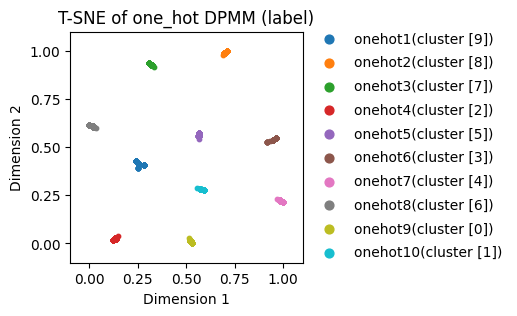

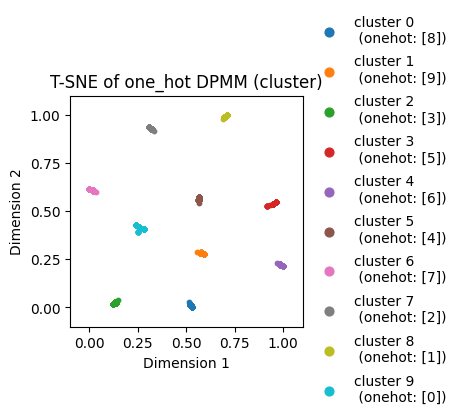

In [205]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.set_title('T-SNE of one_hot DPMM (label)')
ax1.set_xlim(xmin=-0.1,xmax=1.1)
ax1.set_ylim(ymin=-0.1,ymax=1.1)
for i in range(10):
    env_clusters = df.cluster[group_index_dict[i]].unique()
    ax1.scatter(x=df.x[group_index_dict[i]],y=df.y[group_index_dict[i]], 
               s=10, 
            #    label='{}(cluster {})'.format(env_names[i], df.cluster[group_index_dict[i][0]]),
            label='onehot{}(cluster {})'.format(i+1, env_clusters)
               )
fig1.legend(loc='center left', 
           bbox_to_anchor=(0.9, 0.5), 
           markerscale=2.0, 
           frameon=False, 
           labelspacing=0.7,
           )
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.set_title('T-SNE of one_hot DPMM (cluster)')
ax2.set_xlim(xmin=-0.1,xmax=1.1)
ax2.set_ylim(ymin=-0.1,ymax=1.1)

for i in range(len(ar)):
    cluster_onehot = df.label[group_index_dict2[i]].unique()
    ax2.scatter(x=df.x[group_index_dict2[i]],y=df.y[group_index_dict2[i]], 
               s=10, label='cluster {} \n (onehot: {})'.format(i, cluster_onehot))
fig2.legend(loc='center left', 
           bbox_to_anchor=(0.9, 0.5), 
           markerscale=2.0, 
           frameon=False, 
           labelspacing=0.7,
           )
plt.show()

In [206]:
z2 = one_hot[torch.randint(one_hot.shape[0], (1280,))]
z2_in = XData(z2.detach().cpu().numpy())
z_label2 = np.argmax(z2, axis=-1)

In [207]:
model2, info_dict2 = bnpy.run(z2_in, 'DPMixtureModel', 'DiagGauss', 'memoVB',
                            output_path=save_dir+'2nd/',
                            initname=info_dict['task_output_path'],
                            K=info_dict['K_history'][-1], gamma0=5.0,
                            sF=0.001, ECovMat='eye',
                            moves='birth,merge', nBatch=1, nLap=2,

                            # birth kwargs
                            b_stopLap=2,
                            b_Kfresh=10,
                            b_minNumAtomsForNewComp=16.0,
                            b_minNumAtomsForTargetComp=16.0,
                            b_minNumAtomsForRetainComp=16.0,
                            b_minPercChangeInNumAtomsToReactivate=0.05,
                            b_debugWriteHTML=0,
                            
                            # merge kwargs
                            m_startLap=2,
                            m_maxNumPairsContainingComp=50,
                            m_nLapToReactivate=5,
                            m_pair_ranking_procedure='obsmodel_elbo',
                            # m_pair_ranking_procedure: total_size
                            m_pair_ranking_direction='descending',
                            # **dict(
                            #     sum(map(list, [self.birth_kwargs.items(),
                            #                     self.merge_kwargs.items()]), []))

                            )

Dataset Summary:
X Data
  total size: 1280 units
  batch size: 1280 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 12  ...
  beta = [ 0.01  0.01]  ...
  Expectations
  E[  mean[k]] = 
  [ 0  0] ...
  E[ covar[k]] = 
  [[0.001 0.   ]
   [0.    0.001]] ...
Initialization:
  initname = /home/yuan/Desktop/MasterThesis/src/CARE/bnpy/examples_jupyter/01_asterisk_K8/z_test/1
  K = 10 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /home/yuan/Desktop/MasterThesis/src/CARE/bnpy/examples_jupyter/01_asterisk_K8/z_test/2nd/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
BIRTH @ lap 1.00 : Added 0 states. 0/9 succeeded. 0/9 failed eval phase. 

In [208]:
from sklearn.manifold import TSNE
import pandas as pd

resp_z2, cluster_z2 = cluster_assignments(z2_in)
ar2, num2=np.unique(cluster_z2, return_counts=True)
print(ar2)
print(num2)

z_embedded_2 = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(z2)
z_min2, z_max2 = z_embedded_2.min(0), z_embedded_2.max(0)
z_embedded_norm_2 = (z_embedded_2 - z_min2) / (z_max2 - z_min2)
df2 = pd.DataFrame(z_embedded_norm_2, columns=['x','y'])
df2.insert(loc=2, column='label', value=z_label2)
df2.insert(loc=3, column='cluster', value=cluster_z2)
df2.head()

[0 1 2 3 4 5 6 7 8 9]
[130 150 131 128 130 114 127 119 120 131]


,x,y,label,cluster
0,0.982674,0.748241,7,6
1,0.663631,0.964733,1,8
2,0.400058,0.095679,8,0
3,0.671524,0.981043,1,8
4,0.272944,0.877140,5,3


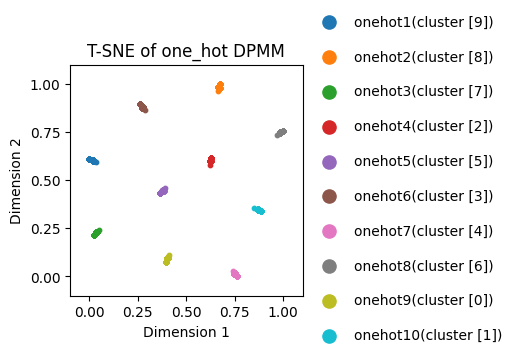

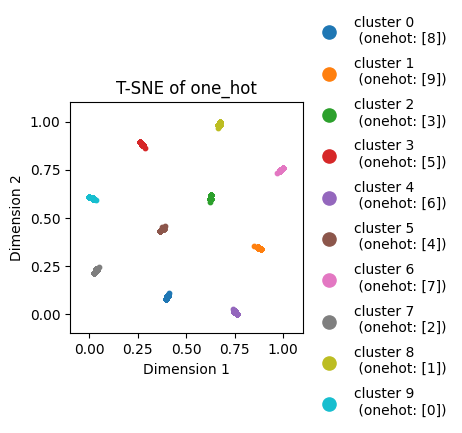

In [209]:
g3=df2.groupby('label')
assert 10 == len(g3.groups)
group_index_dict3 = g3.groups

g4=df2.groupby('cluster')
assert len(ar2) == len(g4.groups)
group_index_dict4 = g4.groups

import matplotlib.pyplot as plt

fig3, ax3 = plt.subplots()
ax3.set_xlabel('Dimension 1')
ax3.set_ylabel('Dimension 2')
ax3.set_title('T-SNE of one_hot DPMM')
ax3.set_xlim(xmin=-0.1,xmax=1.1)
ax3.set_ylim(ymin=-0.1,ymax=1.1)
for i in range(10):
    env_clusters = df2.cluster[group_index_dict3[i]].unique()
    ax3.scatter(x=df2.x[group_index_dict3[i]],y=df2.y[group_index_dict3[i]], 
               s=10, 
            #    label='{}(cluster {})'.format(env_names[i], df.cluster[group_index_dict[i][0]]),
            label='onehot{}(cluster {})'.format(i+1, env_clusters)
               )
fig3.legend(loc='center left', 
           bbox_to_anchor=(0.9, 0.5), 
           markerscale=3.0, 
           frameon=False, 
           labelspacing=1.5,
           )
plt.show()

fig4, ax4 = plt.subplots()
ax4.set_xlabel('Dimension 1')
ax4.set_ylabel('Dimension 2')
ax4.set_title('T-SNE of one_hot')
ax4.set_xlim(xmin=-0.1,xmax=1.1)
ax4.set_ylim(ymin=-0.1,ymax=1.1)

for i in range(len(ar2)):
    cluster_onehot = df2.label[group_index_dict4[i]].unique()
    ax4.scatter(x=df2.x[group_index_dict4[i]],y=df2.y[group_index_dict4[i]], 
               s=10, label='cluster {} \n (onehot: {})'.format(i, cluster_onehot))
fig4.legend(loc='center left', 
           bbox_to_anchor=(0.9, 0.5), 
           markerscale=3.0, 
           frameon=False, 
           labelspacing=0.8,
           )
plt.show()

### META-Embedding DPMM TSNE

In [24]:
import json
import torch
import torch.nn as nn

path='metaworld-mt10.json'
# path='gpt_mt10_metadata.json'
ordered_task_list = ['reach-v1', 'push-v1', 'pick-place-v1', 'door-open-v1', 
                     'drawer-open-v1', 'drawer-close-v1', 'button-press-topdown-v1', 
                     'peg-insert-side-v1', 'window-open-v1', 'window-close-v1']
num_embeddings = 10

with open(path) as f:
    metadata = json.load(f) # dict with key='task name, e.g. reach-v1', value = list with 768 length
    # ordered_task_list from experiment, build_envs(), metadata
    # for key, val in metadata.items():
    #     print(key,val[:10])
    pretrained_embedding = torch.Tensor(
        [metadata[task] for task in ordered_task_list]
    )
    assert num_embeddings == pretrained_embedding.shape[0] # num embedding == num_envs
    pretrained_embedding_dim = pretrained_embedding.shape[1] # Input of pretrained NLP model = 768 in mt10
    
    pretrained_embedding = nn.Embedding.from_pretrained(
        embeddings=pretrained_embedding,
        freeze=True,
    )
pretrained_embedding

Embedding(10, 768)

In [25]:
idx = torch.arange(10)
# exclude task 8
# idx = torch.Tensor([0,1,2,3,4,5,6,8,9]).long()
base_encoding = pretrained_embedding(idx)
z_meta_label = torch.randint(base_encoding.shape[0], (5000,))
z_meta = base_encoding[z_meta_label]
z_meta_in = XData(z_meta.detach().cpu().numpy())

print(base_encoding[:,:5])
print(z_meta_label[:10])
print(z_meta[:10,:5])
# pop task 8 peg [-5.9498e-02,  8.2971e-02, -2.1722e-02, -9.0613e-02, -2.1790e-03],


tensor([[-4.5648e-02,  8.4957e-02, -3.5579e-02, -7.7425e-02,  2.4765e-02],
        [-5.0242e-02,  1.0476e-01, -2.5338e-02, -9.4010e-02,  1.8416e-02],
        [-5.1684e-02,  9.5881e-02, -1.9850e-02, -9.5338e-02,  2.0583e-02],
        [-4.8222e-02,  9.0023e-02, -4.6447e-02, -1.0190e-01,  7.3630e-03],
        [-7.0459e-02,  9.3335e-02, -2.3758e-02, -1.1056e-01, -4.8860e-05],
        [-6.3647e-02,  1.0310e-01, -3.8876e-02, -1.0232e-01, -1.9297e-02],
        [-6.9012e-02,  1.0359e-01, -3.1127e-02, -1.0181e-01,  2.0462e-02],
        [-5.9498e-02,  8.2971e-02, -2.1722e-02, -9.0613e-02, -2.1790e-03],
        [-6.8866e-02,  9.8014e-02, -3.0100e-02, -1.1455e-01, -1.7682e-02],
        [-6.8473e-02,  1.0157e-01, -3.5753e-02, -1.2450e-01, -1.8079e-02]])
tensor([8, 6, 3, 8, 0, 3, 4, 9, 1, 3])
tensor([[-6.8866e-02,  9.8014e-02, -3.0100e-02, -1.1455e-01, -1.7682e-02],
        [-6.9012e-02,  1.0359e-01, -3.1127e-02, -1.0181e-01,  2.0462e-02],
        [-4.8222e-02,  9.0023e-02, -4.6447e-02, -1.0190e-01,

In [26]:
import os
save_dir = "/home/yuan/Desktop/MasterThesis/src/CARE/bnpy/examples_jupyter/01_asterisk_K8/z_test/meta/"

model_meta, info_dict_meta = bnpy.run(z_meta_in, 'DPMixtureModel', 'DiagGauss', 'memoVB',
                            output_path=save_dir,
                            initname='randexamples',
                            K=1, gamma0=5.0,
                            ###############################################################################
                            sF=1e-5, ECovMat='eye', # sF=1e-5, nBatch=5 able to detect 9 clusters except task 8 peg insert
                            ###############################################################################
                            moves='birth,merge', nBatch=5, nLap=2,
                            b_startLap=1,

                            # birth kwargs
                            b_stopLap=2,
                            b_Kfresh=10,
                            b_minNumAtomsForNewComp=16.0,
                            b_minNumAtomsForTargetComp=16.0,
                            b_minNumAtomsForRetainComp=16.0,
                            b_minPercChangeInNumAtomsToReactivate=0.02,
                            b_debugWriteHTML=0,
                            
                            # merge kwargs
                            m_startLap=2,
                            m_maxNumPairsContainingComp=50,
                            m_nLapToReactivate=1,
                            m_pair_ranking_procedure='obsmodel_elbo',
                            # m_pair_ranking_procedure='total_size',
                            m_pair_ranking_direction='descending',
                            # **dict(
                            #     sum(map(list, [self.birth_kwargs.items(),
                            #                     self.merge_kwargs.items()]), []))
                            )

Dataset Summary:
X Data
  total size: 5000 units
  batch size: 1000 units
  num. batches: 5
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 770  ...
  beta = [ 0.00768  0.00768]  ...
  Expectations
  E[  mean[k]] = 
  [ 0  0] ...
  E[ covar[k]] = 
  [[1.e-05 0.e+00]
   [0.e+00 1.e-05]] ...
Initialization:
  initname = randexamples
  K = 1 (number of clusters)
  seed = 1607680
  elapsed_time: 0.1 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /home/yuan/Desktop/MasterThesis/src/CARE/bnpy/examples_jupyter/01_asterisk_K8/z_test/meta/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
    0.200/2 after      1 sec. |   1323.2 MiB | K    8 | loss -4.112565069e+00 |  
    0.400/2 after      3 sec. |   1323.2 MiB | K   13 

In [27]:
import numpy as np
def cluster_assignments(z):
    if type(z) is not XData:
        z = XData(z.detach().cpu().numpy())
    LP = model_meta.calc_local_params(z)
    # Here, resp is a 2D array of size N x K.
    # Each entry resp[n, k] gives the probability
    # that data atom n is assigned to cluster k under
    # the posterior.
    resp = LP['resp']
    # To convert to hard assignments
    # Here, Z is a 1D array of size N, where entry Z[n] is an integer in the set {0, 1, 2, … K-1, K}.
    Z = resp.argmax(axis=1)
    return resp, Z

resp_meta_z, cluster_meta_z = cluster_assignments(z_meta_in)
ar_meta, num_meta=np.unique(cluster_meta_z, return_counts=True)
print(ar_meta)
print(num_meta)

from sklearn.manifold import TSNE
import pandas as pd

z_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(z_meta)
z_min, z_max = z_embedded.min(0), z_embedded.max(0)
z_embedded_norm = (z_embedded - z_min) / (z_max - z_min)
df3 = pd.DataFrame(z_embedded_norm, columns=['x','y'])
df3.insert(loc=2, column='label', value=z_meta_label)
df3.insert(loc=3, column='cluster', value=cluster_meta_z)
df3.head()

[0 1 2 3 4 5 6 7 8 9]
[529 542 509 507 515 444 472 524 470 488]


,x,y,label,cluster
0,0.273314,0.572174,8,4
1,0.343161,0.366510,6,8
2,0.401305,0.106997,3,7
3,0.273314,0.572174,8,4
4,0.189622,0.226313,0,5


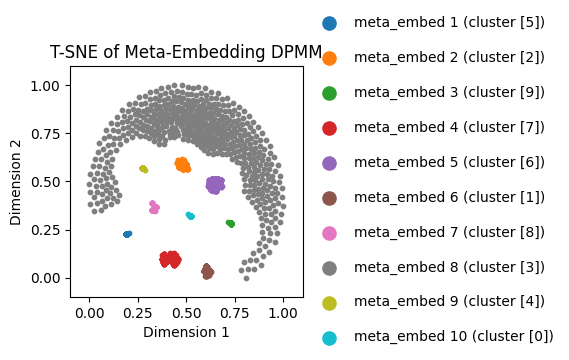

TypeError: only integer scalar arrays can be converted to a scalar index

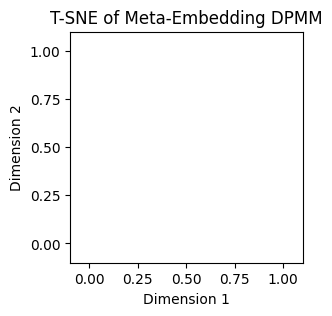

In [29]:
g5=df3.groupby('label')
assert base_encoding.shape[0] == len(g5.groups)
group_index_dict5 = g5.groups

g6=df3.groupby('cluster')
assert len(ar_meta) == len(g6.groups)
group_index_dict6 = g6.groups

import matplotlib.pyplot as plt

fig3, ax3 = plt.subplots()
ax3.set_xlabel('Dimension 1')
ax3.set_ylabel('Dimension 2')
ax3.set_title('T-SNE of Meta-Embedding DPMM')
ax3.set_xlim(xmin=-0.1,xmax=1.1)
ax3.set_ylim(ymin=-0.1,ymax=1.1)
for i in range(base_encoding.shape[0]):
    env_clusters = df3.cluster[group_index_dict5[i]].unique()
    ax3.scatter(x=df3.x[group_index_dict5[i]],y=df3.y[group_index_dict5[i]], 
               s=10, 
            #    label='{}(cluster {})'.format(env_names[i], df.cluster[group_index_dict[i][0]]),
            label='meta_embed {} (cluster {})'.format(i+1, env_clusters)
               )
fig3.legend(loc='center left', 
           bbox_to_anchor=(0.9, 0.5), 
           markerscale=3.0, 
           frameon=False, 
           labelspacing=1.5,
           )
plt.show()

fig4, ax4 = plt.subplots()
ax4.set_xlabel('Dimension 1')
ax4.set_ylabel('Dimension 2')
ax4.set_title('T-SNE of Meta-Embedding DPMM')
ax4.set_xlim(xmin=-0.1,xmax=1.1)
ax4.set_ylim(ymin=-0.1,ymax=1.1)

for i in range(ar_meta):
    cluster_metalabel = df3.label[group_index_dict6[i]].unique()
    ax4.scatter(x=df3.x[group_index_dict6[i]],y=df3.y[group_index_dict6[i]], 
               s=10, label='cluster {} \n (meta_embed: {})'.format(i, cluster_metalabel))
fig4.legend(loc='center left', 
           bbox_to_anchor=(0.9, 0.5), 
           markerscale=3.0, 
           frameon=False, 
           labelspacing=0.8,
           )
plt.show()